## Preprocessing Pipeline

In line with Prof Erik's "NLP Suitcase", which is shown below:

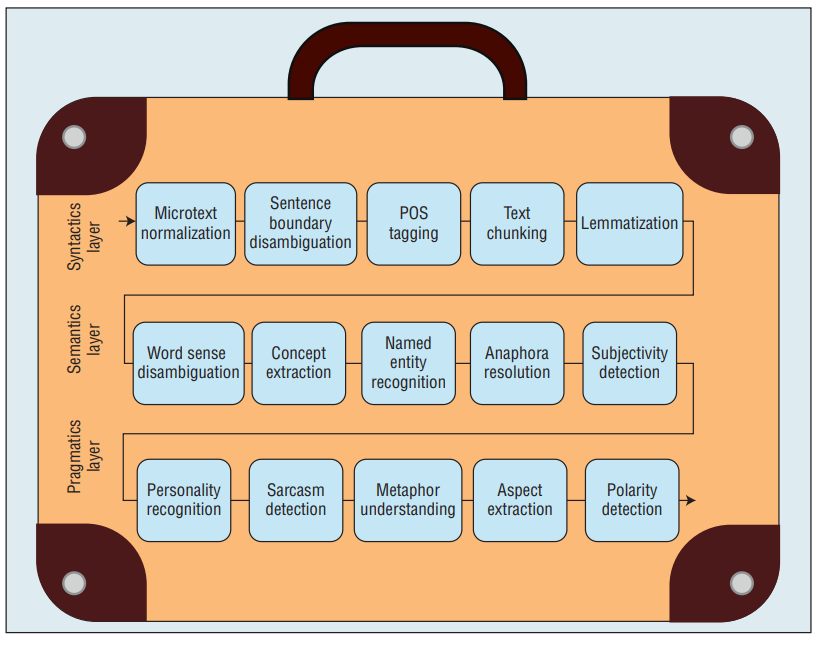

This notebook will be applying several of the above techniques on a reddit corpus (located in `../data/data.csv` )

## Preparing Evaluation Dataset

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('../data/data.csv')

In [3]:
df = df[df['data'].notna()]
df = df['data']

In [4]:
df[:10]

0    Are we in a recession or not?Lately I've seen ...
1    What Are Your Moves Tomorrow, February 26, 202...
2    Thank you Nancy Pelosi I’m 18, convinced my mo...
3    Imitator's Reckoning: $AI Anticipating a Downf...
4    What are the AI derivative plays? If NVIDIA an...
5    Let’s talk MARA vs GBTC Feeling like a nutty p...
6    What will AT&T look like this week? Customers ...
7    No Free Lunch: INTC ER **Tl;dr**: I see ER Dro...
8    AI and Semi-conductors are the present and nea...
9    Spotted a Nikola semi truck the other day . It...
Name: data, dtype: object

In [5]:
print(type(df))

<class 'pandas.core.series.Series'>


In [6]:
# Create new evaluation dataset by randomly sampling 10% of the original dataframe for manual labelling
# sample_df = df.sample(frac=0.1, random_state=1)

# sample_df.to_csv('../data/eval_set.csv') #, encoding='utf-8'

The above dataset shall be manually annotated, and the annotated dataset is available here:
https://docs.google.com/spreadsheets/d/1zpP5BgxVA1zcXQJqD_sprFvtGYlChFAHkFyyal0yyKc/edit?usp=sharing


In [7]:
import pandas as pd
import string

### 1) Case Normalisation

Removing microtext, which has  relaxed 
spelling and reliance on abbreviations, acronyms, and emoticon In a social media corpus such as Reddit, it is common and expected to have acronyms and microtext. .


In [8]:
def lowercase(series):
    series = pd.Series([i.lower() for i in df])
    return series

### 2) Punctuation Removal

In [9]:
def punc_removal(df):
    series = pd.Series([text.translate(text.maketrans("", "", string.punctuation)) for text in df])
    return series

### Visualise Zipf's Law

But before that, good to visualise the num of distinct words etc in dataset and whether it obeys Zipf's Law

In [10]:
# visualise dataframe words
# before that, remove punctuation etc

df = lowercase(df)
df = punc_removal(df)

In [11]:
count_df = df.to_frame()
count_df.rename(columns={0: 'data'}, inplace=True)

In [12]:
count_df.columns

Index(['data'], dtype='object')

In [13]:
count_df[:10]

,data
0,are we in a recession or notlately ive seen bi...
1,what are your moves tomorrow february 26 2024 ...
2,thank you nancy pelosi i’m 18 convinced my mom...
3,imitators reckoning ai anticipating a downfall...
4,what are the ai derivative plays if nvidia and...
5,let’s talk mara vs gbtc feeling like a nutty p...
6,what will att look like this week customers ar...
7,no free lunch intc er tldr i see er drop i sel...
8,ai and semiconductors are the present and near...
9,spotted a nikola semi truck the other day it ...


In [ ]:
# get counts of each distinct word

new_count_df = count_df.data.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

In [ ]:
len(new_count_df.index)

In [ ]:
# new_count_df = new_count_df.to_frame()
new_count_df.rename(columns={0:'count'}, inplace=True)

In [ ]:
final_df = new_count_df.sort_values('count', ascending=False)

In [ ]:
final_df[:50]

In [ ]:
len(final_df)

### 3) Stopword Identification and Removal

From https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html#:~:text=The%20general%20strategy%20for%20determining,documents%20being%20indexed%2C%20as%20a

""The general strategy for determining a stop list is to sort the terms by collection frequency (the total number of times each term appears in the document collection), and then to take the most frequent terms, often hand-filtered for their semantic content relative to the domain of the documents being indexed, as a stop list , the members of which are then discarded during indexing.""

In [ ]:
# visualisation on stopwords
# as the visualisation is too cramped, will be truncating the x axis of words to the top 10k words (out of 92k)
fig = final_df[:100].plot(kind='bar', y = 'count',figsize=(100,60))
fig.get_figure().savefig('100_words_freq.png')

After some trial and error, decided on narrowing down the top 30 as possible stopwords.


**One exception: the word 'but' should be kept, as it gives crucial sentiment and subjectivity information.**

In [141]:
stopwords = final_df[:30]
stopwords

,count
the,84061.0
to,43967.0
and,40593.0
of,37220.0
,37072.0
a,35404.0
for,32916.0
in,31577.0
is,21502.0
on,16589.0


In [142]:
stopwords = stopwords.drop('but')
stopwords

,count
the,84061.0
to,43967.0
and,40593.0
of,37220.0
,37072.0
a,35404.0
for,32916.0
in,31577.0
is,21502.0
on,16589.0


In [186]:
stopwords_list = stopwords['count'].keys().tolist()

In [232]:
stopwords.to_csv('../data/stopwords.csv')

In [187]:
count_df.columns

Index(['data'], dtype='object')

In [214]:
test_df = count_df

In [215]:
for word in stopwords_list:
    # removing stopwords from dataset
    print('Replacing ' + word)
    test_df['data'] = test_df['data'].apply(lambda x: x.replace(' '+word+' ', ' '))

Replacing the
Replacing to
Replacing and
Replacing of
Replacing 
Replacing a
Replacing for
Replacing in
Replacing is
Replacing on
Replacing here
Replacing this
Replacing i
Replacing that
Replacing stock
Replacing with
Replacing it
Replacing as
Replacing are
Replacing at
Replacing click
Replacing its
Replacing be
Replacing from
Replacing have
Replacing you
Replacing earnings
Replacing market
Replacing has


In [216]:
test_df[:10]
# problem: it replaced it when it is INSIDE a word

,data,length
0,are we recession or not lately ive seen big dr...,164
1,what your moves tomorrow february 26 2024 make...,272
2,thank nancy pelosi i’m 18 convinced my mom giv...,190
3,imitators reckoning ai anticipating downfall n...,827
4,what ai derivative plays if nvidia amd first m...,287
5,let’s talk mara vs gbtc feeling like nutty pro...,310
6,what will att look like week customers raging ...,542
7,no free lunch intc er tldr see er drop sell na...,523
8,ai semiconductors present near future what’s l...,495
9,spotted nikola semi truck other day actually w...,57


In [229]:
# removing any rows w only 1 or 2 words
# creating length row
test_df['length'] = test_df.data.str.split().str.len()

new_test_df = test_df[test_df.length > 2].sort_values('length')

In [230]:
new_test_df[:10]

,data,length
6121,my art ai,3
349,perfect batman doji,3
7607,aiir commentary 12202023,3
4964,halving coming soon,3
4965,when satcent parity,3
3566,duot duos technologies,3
6240,shiba x200b\n\ninuhttpspreviewredditxcffogde9t...,3
370,nvda er outcome,3
374,nvda moon 💰💰💰,3
377,we did boys,3


### 4) Removing Special Characters

In [235]:
import re
# Remove URLS
new_test_df.data = new_test_df.data.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
new_test_df.data   = new_test_df.data.apply(lambda x:' '.join(re.findall(r'\w+', x)))

In [236]:
new_test_df[:10]

,data,length
6121,my art ai,3
349,perfect batman doji,3
7607,aiir commentary 12202023,3
4964,halving coming soon,3
4965,when satcent parity,3
3566,duot duos technologies,3
6240,shiba x200b inu,3
370,nvda er outcome,3
374,nvda moon,3
377,we did boys,3


### 5) Lemmatization

From https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html :
- Noted that ""getting better value from text normalization depends more on pragmatic issues of word use than on formal issues of linguistic morphology.""

In [237]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [242]:
# import nltk
# nltk.download('wordnet')

In [248]:
def lemmatization(df):
    lemma_df = df['data'].apply(lambda x: x.replace(x,lemmatizer.lemmatize(x)))
    return lemma_df

In [249]:
lemma_df = lemmatization(new_test_df)

In [250]:
lemma_df[:10]

6121                   my art ai
349          perfect batman doji
7607    aiir commentary 12202023
4964         halving coming soon
4965         when satcent parity
3566      duot duos technologies
6240             shiba x200b inu
370              nvda er outcome
374                    nvda moon
377                  we did boys
Name: data, dtype: object

In [251]:
lemma_df.to_csv('../data/processed_df.csv')